#### Sometimes, strange questions pop into my head. For example, I've been wondering if the Harry Potter movies and books have had an impact on the choice of names for children. But what more books or movies? Is there a difference in the choice of names between the USA and the UK? In this little notebook, I'll try to explore these questions. I obtained a dataframe about baby names in the UK from [a library in the R language](https://mine-cetinkaya-rundel.github.io/ukbabynames), authored and maintained by Mine Çetinkaya-Rundel. For the USA, I retrieved a dataframe about baby names from Kaggle [link](https://www.kaggle.com/datasets/donkea/ssa-names-1910-2021). Copyright for the images: [benmornin](https://www.instagram.com/benmornin)

### Let's import the necessary libraries that we will be using.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from PIL import Image

### Now let's load our dataframes. First, we'll load the information about babynames in the UK and take a quick look at this data.

In [2]:
df_uk = pd.read_csv('/Users/sasha/Desktop/potter/babynames_uk.csv')
df_uk.head()

,year,sex,name,n,rank,nation
0,1996,F,SOPHIE,7087,1,England & Wales
1,1996,F,CHLOE,6824,2,England & Wales
2,1996,F,JESSICA,6711,3,England & Wales
3,1996,F,EMILY,6415,4,England & Wales
4,1996,F,LAUREN,6299,5,England & Wales


### Okay, as we can see, all the names are written in all capital letters. I would like to convert them so that only the first letter is capitalized.

In [3]:
df_uk['name'] = df_uk['name'].str.capitalize()
df_uk.head()

,year,sex,name,n,rank,nation
0,1996,F,Sophie,7087,1,England & Wales
1,1996,F,Chloe,6824,2,England & Wales
2,1996,F,Jessica,6711,3,England & Wales
3,1996,F,Emily,6415,4,England & Wales
4,1996,F,Lauren,6299,5,England & Wales


### Second, we'll load the information about babynames in the USA and take a quick look at this data.

In [4]:
df_usa = pd.read_csv('/Users/sasha/Desktop/potter/babynames_usa.csv')
df_usa.head()

,State,Sex,Year,Name,Count
0,VA,F,1910,Mary,848
1,VA,F,1910,Virginia,270
2,VA,F,1910,Elizabeth,254
3,VA,F,1910,Ruth,218
4,VA,F,1910,Margaret,209


### Let's examine our dataframe. First, let's filter the information to focus on the number of children who were given the names Ron, Harry, and Hermione between 1996 and 2013 in the USA.


In [5]:
names = ['Ron', 'Hermione', 'Harry']
years = range(1996, 2013)

filtered_df_usa = df_usa[(df_usa['Name'].isin(names)) & (df_usa['Year'].isin(years))]
result_usa = filtered_df_usa.groupby(['Name', 'Year'])['Count'].sum().reset_index()

print(result_usa)



        Name  Year  Count
0      Harry  1996    418
1      Harry  1997    393
2      Harry  1998    447
3      Harry  1999    410
4      Harry  2000    384
5      Harry  2001    394
6      Harry  2002    392
7      Harry  2003    403
8      Harry  2004    385
9      Harry  2005    423
10     Harry  2006    376
11     Harry  2007    395
12     Harry  2008    335
13     Harry  2009    332
14     Harry  2010    306
15     Harry  2011    280
16     Harry  2012    270
17  Hermione  2002      5
18  Hermione  2003     24
19  Hermione  2004     15
20  Hermione  2005     22
21  Hermione  2006     31
22  Hermione  2007     21
23  Hermione  2008     30
24  Hermione  2009     21
25  Hermione  2010     12
26  Hermione  2011     16
27  Hermione  2012     21
28       Ron  1996     74
29       Ron  1997     74
30       Ron  1998     46
31       Ron  1999     61
32       Ron  2000     54
33       Ron  2001     37
34       Ron  2002     48
35       Ron  2003     52
36       Ron  2004     29
37       Ron

### Similarly, let's also explore the data for the UK.

In [6]:
names = ['Ron', 'Hermione', 'Harry']
years = range(1996, 2013)

filtered_df_uk = df_uk[(df_uk['name'].isin(names)) & (df_uk['year'].isin(years))]
result_uk = filtered_df_uk.groupby(['name', 'year'])['n'].sum().reset_index()


result_uk


,name,year,n
0,Harry,1996,4528
1,Harry,1997,4758
2,Harry,1998,4890
3,Harry,1999,5079
4,Harry,2000,6262
5,Harry,2001,5880
6,Harry,2002,4753
7,Harry,2003,4854
8,Harry,2004,4889
9,Harry,2005,4852


### I appreciate tables, but they might not be as engaging and clear. So, let's add a touch of magic and visualize our dataframes. First, let's do some preparatory work by filtering the data for the US and UK to obtain separate datasets for each country.

In [7]:
hermione_uk = df_uk[(df_uk['name'] == 'Hermione') & (df_uk['year'].isin(years))]
result_hermione_uk = hermione_uk.groupby(['name', 'year'])['n'].sum().reset_index()

harry_uk = df_uk[(df_uk['name'] == 'Harry') & (df_uk['year'].isin(years))]
result_harry_uk = harry_uk.groupby(['name', 'year'])['n'].sum().reset_index()

ron_uk = df_uk[(df_uk['name'] == 'Ron') & (df_uk['year'].isin(years))]
result_ron_uk = ron_uk.groupby(['name', 'year'])['n'].sum().reset_index()

In [8]:
hermione_usa = df_usa[(df_usa['Name'] == 'Hermione') & (df_usa['Year'].isin(years))]
result_hermione_usa = hermione_usa.groupby(['Name', 'Year'])['Count'].sum().reset_index()

harry_usa = df_usa[(df_usa['Name'] == 'Harry') & (df_usa['Year'].isin(years))]
result_harry_usa = harry_usa.groupby(['Name', 'Year'])['Count'].sum().reset_index()

ron_usa = df_usa[(df_usa['Name'] == 'Ron') & (df_usa['Year'].isin(years))]
result_ron_usa = ron_usa.groupby(['Name', 'Year'])['Count'].sum().reset_index()


### And now, let the magic begin! Let's delve into the information about the impact of the movie  and book series.

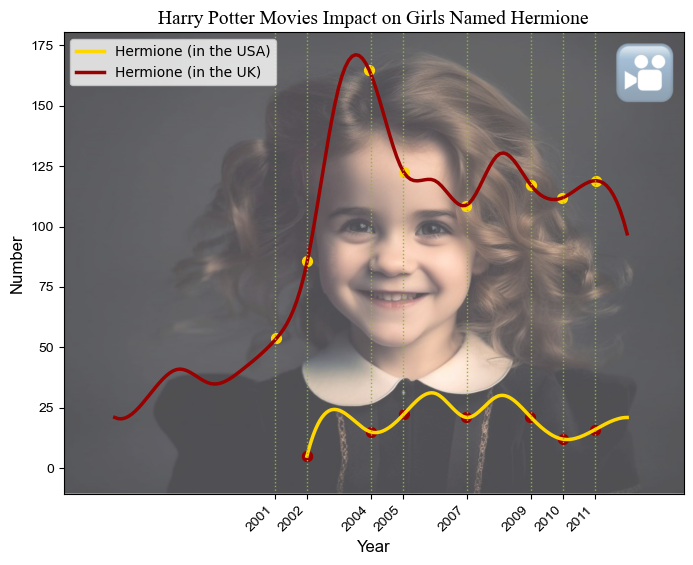

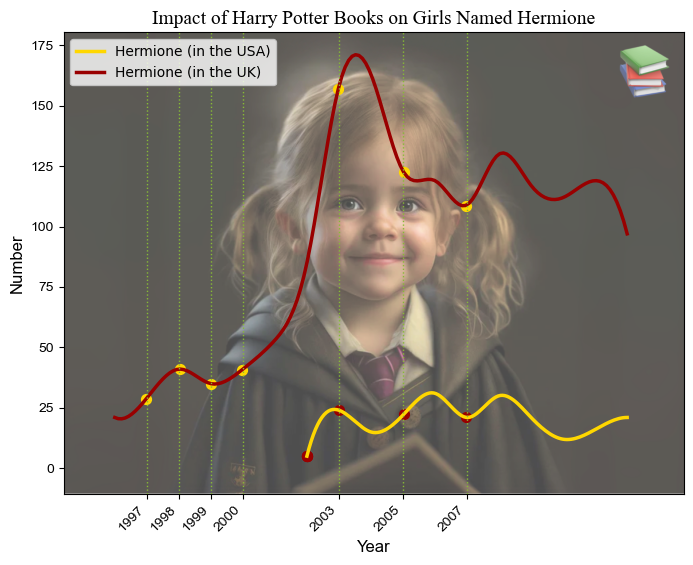

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

x_usa = result_hermione_usa['Year']
y_usa = result_hermione_usa['Count']
x_new_usa = np.linspace(x_usa.min(), x_usa.max(), 150)
spl_usa = make_interp_spline(x_usa, y_usa)
y_smooth_usa = spl_usa(x_new_usa)
plt.plot(x_new_usa, y_smooth_usa, color='#FFD700', linewidth=2.5, label='Hermione (in the USA)')

x_uk = result_hermione_uk['year']
y_uk = result_hermione_uk['n']
x_new_uk = np.linspace(x_uk.min(), x_uk.max(), 150)
spl_uk = make_interp_spline(x_uk, y_uk)
y_smooth_uk = spl_uk(x_new_uk)
plt.plot(x_new_uk, y_smooth_uk, color='#990000', linewidth=2.5, label='Hermione (in the UK)')

xmovies = [2001, 2002, 2004, 2005, 2007, 2009, 2010, 2011]
for xc in xmovies:
    plt.axvline(x=xc, color='#87bb35', linestyle='dotted', linewidth=1)
    idx = np.abs(x_new_usa - xc).argmin()
    idx_uk = np.abs(x_new_uk - xc).argmin()
    plt.scatter(x_new_usa[idx], y_smooth_usa[idx], color='#990000', marker='o', s=50)  
    plt.scatter(x_new_uk[idx_uk], y_smooth_uk[idx_uk], color='#FFD700', marker='o', s=50) 
    
background_image = Image.open("/Users/sasha/Desktop/potter/hermione_movie.png")
xmin, xmax = min(x_usa.min(), x_uk.min()), max(x_usa.max(), x_uk.max())
ymin, ymax = min(y_usa.min(), y_uk.min()), max(y_usa.max(), y_uk.max())
extent = [xmin, xmax, ymin, ymax]
extent[0] -= 0.1 * (extent[1] - extent[0])
extent[1] += 0.1 * (extent[1] - extent[0])
extent[2] -= 0.1 * (extent[3] - extent[2])
extent[3] += 0.1 * (extent[3] - extent[2])
ax.imshow(background_image, extent=extent, aspect='auto', alpha=0.7)

plt.xlabel('Year', fontsize=12, fontname="Arial")
plt.ylabel('Number', fontsize=12, fontname="Arial")
plt.title('Harry Potter Movies Impact on Girls Named Hermione', fontname="Times New Roman", fontsize=14)
plt.legend(loc='upper left')

plt.xticks(xmovies, rotation=45, ha='right', fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.grid(False)



plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

x_usa = result_hermione_usa['Year']
y_usa = result_hermione_usa['Count']
x_new_usa = np.linspace(x_usa.min(), x_usa.max(), 150)
spl_usa = make_interp_spline(x_usa, y_usa)
y_smooth_usa = spl_usa(x_new_usa)
plt.plot(x_new_usa, y_smooth_usa, color='#FFD700', linewidth=2.5, label='Hermione (in the USA)')

x_uk = result_hermione_uk['year']
y_uk = result_hermione_uk['n']
x_new_uk = np.linspace(x_uk.min(), x_uk.max(), 150)
spl_uk = make_interp_spline(x_uk, y_uk)
y_smooth_uk = spl_uk(x_new_uk)
plt.plot(x_new_uk, y_smooth_uk, color='#990000', linewidth=2.5, label='Hermione (in the UK)')

xbooks = [1997, 1998, 1999, 2000, 2003, 2005, 2007]
for xc in xbooks:
    plt.axvline(x=xc, color='#87bb35', linestyle='dotted', linewidth=1)
    idx = np.abs(x_new_usa - xc).argmin()
    idx_uk = np.abs(x_new_uk - xc).argmin()
    plt.scatter(x_new_usa[idx], y_smooth_usa[idx], color='#990000', marker='o', s=50)  
    plt.scatter(x_new_uk[idx_uk], y_smooth_uk[idx_uk], color='#FFD700', marker='o', s=50) 
    
background_image = Image.open("/Users/sasha/Desktop/potter/hermione_books.png")
xmin, xmax = min(x_usa.min(), x_uk.min()), max(x_usa.max(), x_uk.max())
ymin, ymax = min(y_usa.min(), y_uk.min()), max(y_usa.max(), y_uk.max())
extent = [xmin, xmax, ymin, ymax]
extent[0] -= 0.1 * (extent[1] - extent[0])
extent[1] += 0.1 * (extent[1] - extent[0])
extent[2] -= 0.1 * (extent[3] - extent[2])
extent[3] += 0.1 * (extent[3] - extent[2])
ax.imshow(background_image, extent=extent, aspect='auto', alpha=0.7)

plt.xlabel('Year', fontsize=12, fontname="Arial")
plt.ylabel('Number', fontsize=12, fontname="Arial")
plt.title('Impact of Harry Potter Books on Girls Named Hermione', fontname="Times New Roman", fontsize=14)
plt.legend(loc='upper left')

plt.xticks(xbooks, rotation=45, ha='right', fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.grid(False)

plt.show()


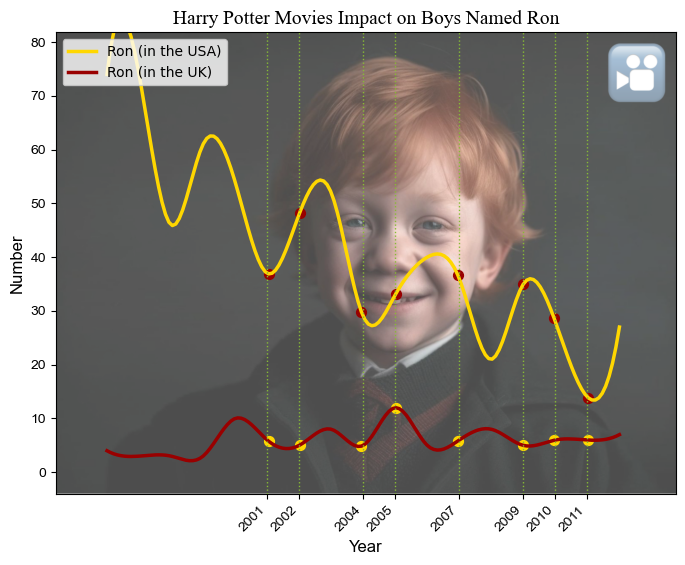

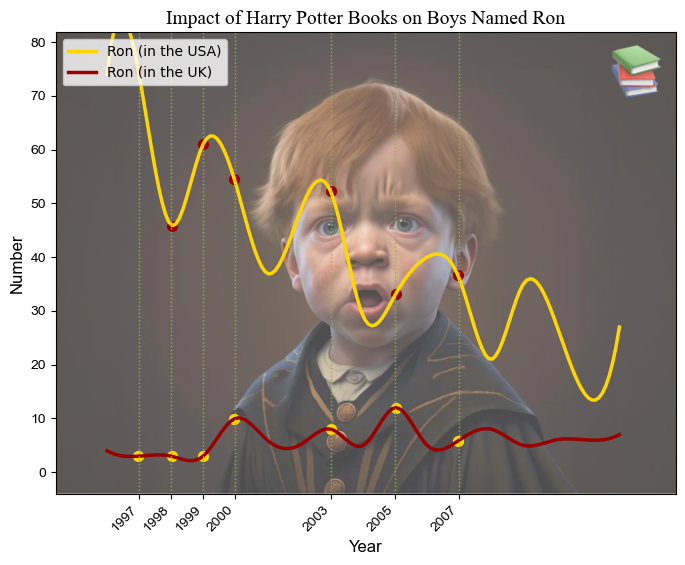

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

x_usa = result_ron_usa['Year']
y_usa = result_ron_usa['Count']
x_new_usa = np.linspace(x_usa.min(), x_usa.max(), 150)
spl_usa = make_interp_spline(x_usa, y_usa)
y_smooth_usa = spl_usa(x_new_usa)
plt.plot(x_new_usa, y_smooth_usa, color='#FFD700', linewidth=2.5, label='Ron (in the USA)')

x_uk = result_ron_uk['year']
y_uk = result_ron_uk['n']
x_new_uk = np.linspace(x_uk.min(), x_uk.max(), 150)
spl_uk = make_interp_spline(x_uk, y_uk)
y_smooth_uk = spl_uk(x_new_uk)
plt.plot(x_new_uk, y_smooth_uk, color='#990000', linewidth=2.5, label='Ron (in the UK)')

xmovies = [2001, 2002, 2004, 2005, 2007, 2009, 2010, 2011]
for xc in xmovies:
    plt.axvline(x=xc, color='#87bb35', linestyle='dotted', linewidth=1)
    idx = np.abs(x_new_usa - xc).argmin()
    idx_uk = np.abs(x_new_uk - xc).argmin()
    plt.scatter(x_new_usa[idx], y_smooth_usa[idx], color='#990000', marker='o', s=50)  
    plt.scatter(x_new_uk[idx_uk], y_smooth_uk[idx_uk], color='#FFD700', marker='o', s=50) 
    
background_image = Image.open("/Users/sasha/Desktop/potter/ron_movie.png")
xmin, xmax = min(x_usa.min(), x_uk.min()), max(x_usa.max(), x_uk.max())
ymin, ymax = min(y_usa.min(), y_uk.min()), max(y_usa.max(), y_uk.max())
extent = [xmin, xmax, ymin, ymax]
extent[0] -= 0.1 * (extent[1] - extent[0])
extent[1] += 0.1 * (extent[1] - extent[0])
extent[2] -= 0.1 * (extent[3] - extent[2])
extent[3] += 0.1 * (extent[3] - extent[2])
ax.imshow(background_image, extent=extent, aspect='auto', alpha=0.7)

plt.xlabel('Year', fontsize=12, fontname="Arial")
plt.ylabel('Number', fontsize=12, fontname="Arial")
plt.title('Harry Potter Movies Impact on Boys Named Ron', fontname="Times New Roman", fontsize=14)
plt.legend(loc='upper left')

plt.xticks(xmovies, rotation=45, ha='right', fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.grid(False)



plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

x_usa = result_ron_usa['Year']
y_usa = result_ron_usa['Count']
x_new_usa = np.linspace(x_usa.min(), x_usa.max(), 150)
spl_usa = make_interp_spline(x_usa, y_usa)
y_smooth_usa = spl_usa(x_new_usa)
plt.plot(x_new_usa, y_smooth_usa, color='#FFD700', linewidth=2.5, label='Ron (in the USA)')

x_uk = result_ron_uk['year']
y_uk = result_ron_uk['n']
x_new_uk = np.linspace(x_uk.min(), x_uk.max(), 150)
spl_uk = make_interp_spline(x_uk, y_uk)
y_smooth_uk = spl_uk(x_new_uk)
plt.plot(x_new_uk, y_smooth_uk, color='#990000', linewidth=2.5, label='Ron (in the UK)')

xbooks = [1997, 1998, 1999, 2000, 2003, 2005, 2007]
for xc in xbooks:
    plt.axvline(x=xc, color='#87bb35', linestyle='dotted', linewidth=1)
    idx = np.abs(x_new_usa - xc).argmin()
    idx_uk = np.abs(x_new_uk - xc).argmin()
    plt.scatter(x_new_usa[idx], y_smooth_usa[idx], color='#990000', marker='o', s=50)  
    plt.scatter(x_new_uk[idx_uk], y_smooth_uk[idx_uk], color='#FFD700', marker='o', s=50) 
    
background_image = Image.open("/Users/sasha/Desktop/potter/ron_books.png")
xmin, xmax = min(x_usa.min(), x_uk.min()), max(x_usa.max(), x_uk.max())
ymin, ymax = min(y_usa.min(), y_uk.min()), max(y_usa.max(), y_uk.max())
extent = [xmin, xmax, ymin, ymax]
extent[0] -= 0.1 * (extent[1] - extent[0])
extent[1] += 0.1 * (extent[1] - extent[0])
extent[2] -= 0.1 * (extent[3] - extent[2])
extent[3] += 0.1 * (extent[3] - extent[2])
ax.imshow(background_image, extent=extent, aspect='auto', alpha=0.7)

plt.xlabel('Year', fontsize=12, fontname="Arial")
plt.ylabel('Number', fontsize=12, fontname="Arial")
plt.title('Impact of Harry Potter Books on Boys Named Ron', fontname="Times New Roman", fontsize=14)
plt.legend(loc='upper left')

plt.xticks(xbooks, rotation=45, ha='right', fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.grid(False)

plt.show()



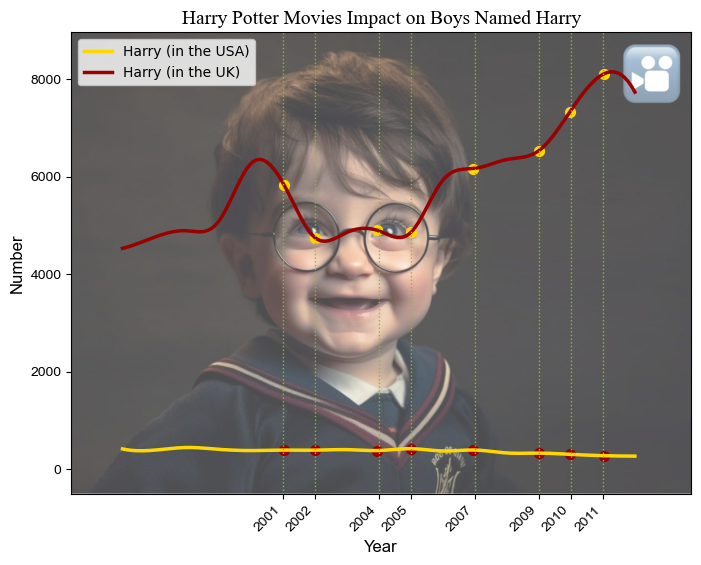

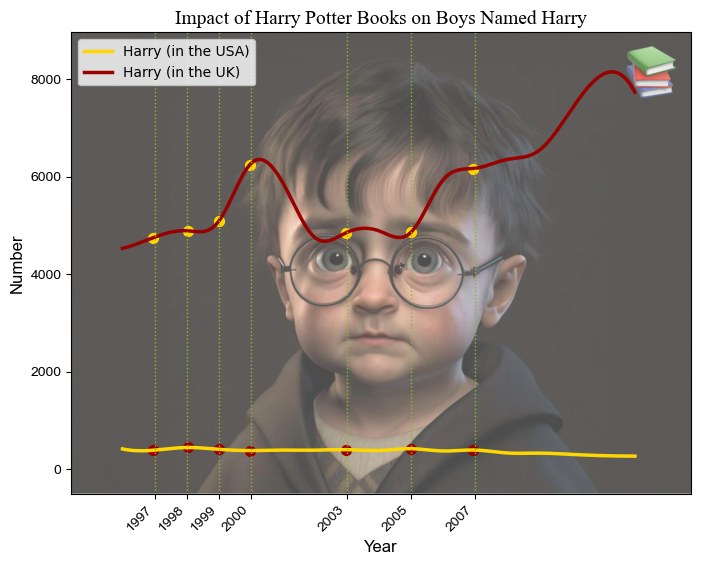

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

x_usa = result_harry_usa['Year']
y_usa = result_harry_usa['Count']
x_new_usa = np.linspace(x_usa.min(), x_usa.max(), 150)
spl_usa = make_interp_spline(x_usa, y_usa)
y_smooth_usa = spl_usa(x_new_usa)
plt.plot(x_new_usa, y_smooth_usa, color='#FFD700', linewidth=2.5, label='Harry (in the USA)')

x_uk = result_harry_uk['year']
y_uk = result_harry_uk['n']
x_new_uk = np.linspace(x_uk.min(), x_uk.max(), 150)
spl_uk = make_interp_spline(x_uk, y_uk)
y_smooth_uk = spl_uk(x_new_uk)
plt.plot(x_new_uk, y_smooth_uk, color='#990000', linewidth=2.5, label='Harry (in the UK)')

xmovies = [2001, 2002, 2004, 2005, 2007, 2009, 2010, 2011]
for xc in xmovies:
    plt.axvline(x=xc, color='#87bb35', linestyle='dotted', linewidth=1)
    idx = np.abs(x_new_usa - xc).argmin()
    idx_uk = np.abs(x_new_uk - xc).argmin()
    plt.scatter(x_new_usa[idx], y_smooth_usa[idx], color='#990000', marker='o', s=50)  
    plt.scatter(x_new_uk[idx_uk], y_smooth_uk[idx_uk], color='#FFD700', marker='o', s=50) 
    
background_image = Image.open("/Users/sasha/Desktop/potter/harry_movie.png")
xmin, xmax = min(x_usa.min(), x_uk.min()), max(x_usa.max(), x_uk.max())
ymin, ymax = min(y_usa.min(), y_uk.min()), max(y_usa.max(), y_uk.max())
extent = [xmin, xmax, ymin, ymax]
extent[0] -= 0.1 * (extent[1] - extent[0])
extent[1] += 0.1 * (extent[1] - extent[0])
extent[2] -= 0.1 * (extent[3] - extent[2])
extent[3] += 0.1 * (extent[3] - extent[2])
ax.imshow(background_image, extent=extent, aspect='auto', alpha=0.7)

plt.xlabel('Year', fontsize=12, fontname="Arial")
plt.ylabel('Number', fontsize=12, fontname="Arial")
plt.title('Harry Potter Movies Impact on Boys Named Harry', fontname="Times New Roman", fontsize=14)
plt.legend(loc='upper left')

plt.xticks(xmovies, rotation=45, ha='right', fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.grid(False)



plt.show()

fig, ax = plt.subplots(figsize=(8, 6))

x_usa = result_harry_usa['Year']
y_usa = result_harry_usa['Count']
x_new_usa = np.linspace(x_usa.min(), x_usa.max(), 150)
spl_usa = make_interp_spline(x_usa, y_usa)
y_smooth_usa = spl_usa(x_new_usa)
plt.plot(x_new_usa, y_smooth_usa, color='#FFD700', linewidth=2.5, label='Harry (in the USA)')

x_uk = result_harry_uk['year']
y_uk = result_harry_uk['n']
x_new_uk = np.linspace(x_uk.min(), x_uk.max(), 150)
spl_uk = make_interp_spline(x_uk, y_uk)
y_smooth_uk = spl_uk(x_new_uk)
plt.plot(x_new_uk, y_smooth_uk, color='#990000', linewidth=2.5, label='Harry (in the UK)')

xbooks = [1997, 1998, 1999, 2000, 2003, 2005, 2007]
for xc in xbooks:
    plt.axvline(x=xc, color='#87bb35', linestyle='dotted', linewidth=1)
    idx = np.abs(x_new_usa - xc).argmin()
    idx_uk = np.abs(x_new_uk - xc).argmin()
    plt.scatter(x_new_usa[idx], y_smooth_usa[idx], color='#990000', marker='o', s=50)  
    plt.scatter(x_new_uk[idx_uk], y_smooth_uk[idx_uk], color='#FFD700', marker='o', s=50) 
    
background_image = Image.open("/Users/sasha/Desktop/potter/harry_books.png")
xmin, xmax = min(x_usa.min(), x_uk.min()), max(x_usa.max(), x_uk.max())
ymin, ymax = min(y_usa.min(), y_uk.min()), max(y_usa.max(), y_uk.max())
extent = [xmin, xmax, ymin, ymax]
extent[0] -= 0.1 * (extent[1] - extent[0])
extent[1] += 0.1 * (extent[1] - extent[0])
extent[2] -= 0.1 * (extent[3] - extent[2])
extent[3] += 0.1 * (extent[3] - extent[2])
ax.imshow(background_image, extent=extent, aspect='auto', alpha=0.7)


plt.xlabel('Year', fontsize=12, fontname="Arial")
plt.ylabel('Number', fontsize=12, fontname="Arial")
plt.title('Impact of Harry Potter Books on Boys Named Harry', fontname="Times New Roman", fontsize=14)
plt.legend(loc='upper left')

plt.xticks(xbooks, rotation=45, ha='right', fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.grid(False)



plt.show()


#### So, what is the conclusion?
- Based on our analysis, it is evident that the impact of the Harry Potter movies is more pronounced in the USA compared to the UK. For instance, the name Hermione started gaining popularity among babies in the USA from the year 2002. 
- Sometimes it is difficult to understand what specifically influenced the movie or book on the growth of the popularity of the name. So in 2005 and 2007, books and films about Harry Potter were released and we can observe a surge in interest in the name Ron.
- Additionally, the name Ron is more popular in the USA as well.
- It is possible that the portrayal of these characters in the films and books, along with the exploration of their new qualities, influenced the increase in the number of children being given these names. For example, in 2004, the film "Harry Potter and the Prisoner of Azkaban" was released, and it aligns with the observed growth in the number of children named Hermione.

### Bonus

In [12]:
neville_uk = df_uk[(df_uk['name'] == 'Neville') & (df_uk['year'].isin(years))]
result_neville_uk = neville_uk.groupby(['name', 'year'])['n'].sum().reset_index()

neville_usa = df_usa[(df_usa['Name'] == 'Neville') & (df_usa['Year'].isin(years))]
result_neville_usa = neville_usa.groupby(['Name', 'Year'])['Count'].sum().reset_index()

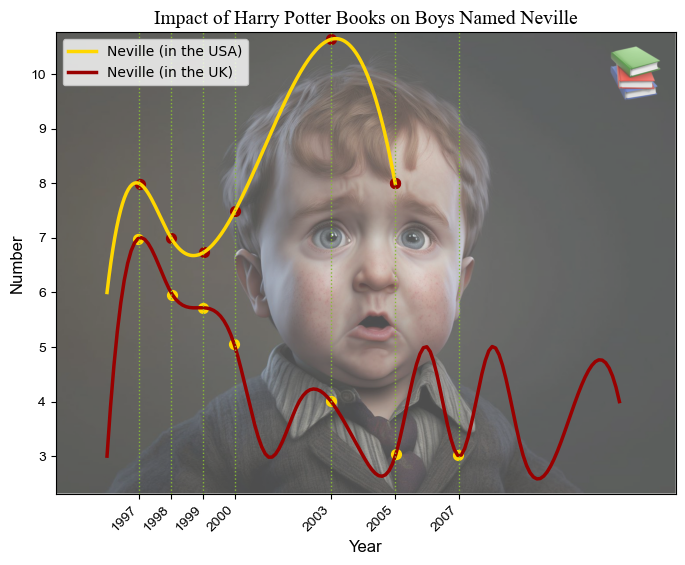

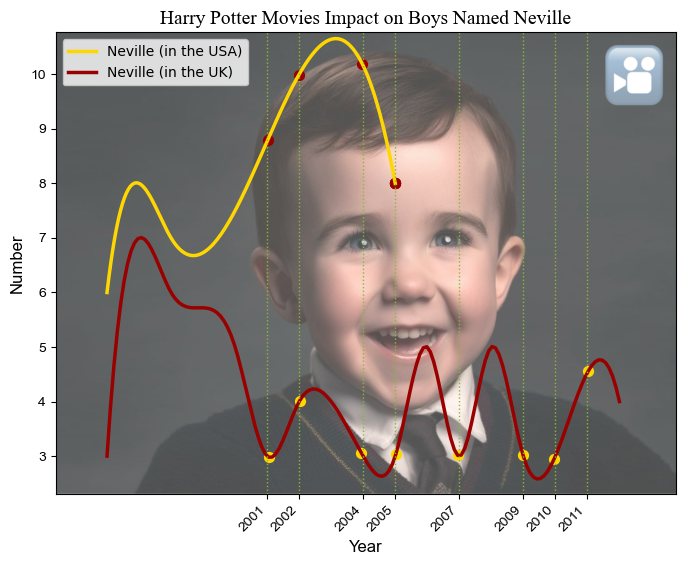

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

x_usa = result_neville_usa['Year']
y_usa = result_neville_usa['Count']
x_new_usa = np.linspace(x_usa.min(), x_usa.max(), 150)
spl_usa = make_interp_spline(x_usa, y_usa)
y_smooth_usa = spl_usa(x_new_usa)
neville_usa_plot = plt.plot(x_new_usa, y_smooth_usa, color='#FFD700', linewidth=2.5, label='Neville (in the USA)')

x_uk = result_neville_uk['year']
y_uk = result_neville_uk['n']
x_new_uk = np.linspace(x_uk.min(), x_uk.max(), 150)
spl_uk = make_interp_spline(x_uk, y_uk)
y_smooth_uk = spl_uk(x_new_uk)
neville_uk_plot = plt.plot(x_new_uk, y_smooth_uk, color='#990000', linewidth=2.5, label='Neville (in the UK)')

xbooks = [1997, 1998, 1999, 2000, 2003, 2005, 2007]
for xc in xbooks:
    plt.axvline(x=xc, color='#87bb35', linestyle='dotted', linewidth=1)
    idx = np.abs(x_new_usa - xc).argmin()
    idx_uk = np.abs(x_new_uk - xc).argmin()
    plt.scatter(x_new_usa[idx], y_smooth_usa[idx], color='#990000', marker='o', s=50)  
    plt.scatter(x_new_uk[idx_uk], y_smooth_uk[idx_uk], color='#FFD700', marker='o', s=50) 
    
background_image = Image.open("/Users/sasha/Desktop/potter/neville_books.png")
xmin, xmax = min(x_usa.min(), x_uk.min()), max(x_usa.max(), x_uk.max())
ymin, ymax = min(y_usa.min(), y_uk.min()), max(y_usa.max(), y_uk.max())
extent = [xmin, xmax, ymin, ymax]
extent[0] -= 0.1 * (extent[1] - extent[0])
extent[1] += 0.1 * (extent[1] - extent[0])
extent[2] -= 0.1 * (extent[3] - extent[2])
extent[3] += 0.1 * (extent[3] - extent[2])
ax.imshow(background_image, extent=extent, aspect='auto', alpha=0.7)

plt.xlabel('Year', fontsize=12, fontname="Arial")
plt.ylabel('Number', fontsize=12, fontname="Arial")
plt.title('Impact of Harry Potter Books on Boys Named Neville', fontname="Times New Roman", fontsize=14)
plt.legend(loc='upper left')

plt.xticks(xbooks, rotation=45, ha='right', fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.grid(False)

plt.show()


fig, ax = plt.subplots(figsize=(8, 6))

x_usa = result_neville_usa['Year']
y_usa = result_neville_usa['Count']
x_new_usa = np.linspace(x_usa.min(), x_usa.max(), 150)
spl_usa = make_interp_spline(x_usa, y_usa)
y_smooth_usa = spl_usa(x_new_usa)
plt.plot(x_new_usa, y_smooth_usa, color='#FFD700', linewidth=2.5, label='Neville (in the USA)')

x_uk = result_neville_uk['year']
y_uk = result_neville_uk['n']
x_new_uk = np.linspace(x_uk.min(), x_uk.max(), 150)
spl_uk = make_interp_spline(x_uk, y_uk)
y_smooth_uk = spl_uk(x_new_uk)
plt.plot(x_new_uk, y_smooth_uk, color='#990000', linewidth=2.5, label='Neville (in the UK)')

xmovies = [2001, 2002, 2004, 2005, 2007, 2009, 2010, 2011]
for xc in xmovies:
    plt.axvline(x=xc, color='#87bb35', linestyle='dotted', linewidth=1)
    idx = np.abs(x_new_usa - xc).argmin()
    idx_uk = np.abs(x_new_uk - xc).argmin()
    plt.scatter(x_new_usa[idx], y_smooth_usa[idx], color='#990000', marker='o', s=50)  
    plt.scatter(x_new_uk[idx_uk], y_smooth_uk[idx_uk], color='#FFD700', marker='o', s=50) 
    
background_image = Image.open("/Users/sasha/Desktop/potter/neville_movie.png")
xmin, xmax = min(x_usa.min(), x_uk.min()), max(x_usa.max(), x_uk.max())
ymin, ymax = min(y_usa.min(), y_uk.min()), max(y_usa.max(), y_uk.max())
extent = [xmin, xmax, ymin, ymax]
extent[0] -= 0.1 * (extent[1] - extent[0])
extent[1] += 0.1 * (extent[1] - extent[0])
extent[2] -= 0.1 * (extent[3] - extent[2])
extent[3] += 0.1 * (extent[3] - extent[2])
ax.imshow(background_image, extent=extent, aspect='auto', alpha=0.7)

plt.xlabel('Year', fontsize=12, fontname="Arial")
plt.ylabel('Number', fontsize=12, fontname="Arial")
plt.title('Harry Potter Movies Impact on Boys Named Neville', fontname="Times New Roman", fontsize=14)
plt.legend(loc='upper left')

plt.xticks(xmovies, rotation=45, ha='right', fontsize=10, fontname="Arial")
plt.yticks(fontsize=10, fontname="Arial")

plt.grid(False)



plt.show()

